In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

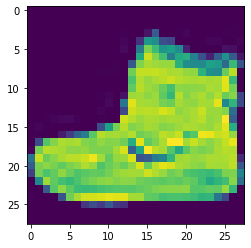

In [4]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6253 - accuracy: 0.7823
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.8601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3451 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3168 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8909


In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3802 - accuracy: 0.8649


[0.38015881180763245, 0.8648999929428101]

Exercises:

In [10]:
classifications = model.predict(test_images)

In [11]:
print(classifications[0])

[1.6098867e-05 1.7315242e-06 7.0764457e-07 3.9092853e-07 3.0525178e-05 4.0429734e-02 9.5617565e-05 8.5534155e-02 2.1549026e-03 8.7173617e-01]


In [12]:
print(test_labels[0])

9


In [15]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print("\n Reached 80% of accuracy so cancelling the traning")
      self.model.stop_training = True

callbacks = myCallbacks()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5, callbacks=[callbacks])


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6267 - accuracy: 0.7813

 Reached 80% of accuracy so cancelling the traning
